In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
data= pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/Ice_Cream.csv')
data.head()



DATE  IPN31152N
0  1972-01-01    59.9622
1  1972-02-01    67.0605
2  1972-03-01    74.2350
3  1972-04-01    78.1120
4  1972-05-01    84.7636

In [85]:

# Preprocess the data
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert DATE column to datetime
data.set_index('DATE', inplace = True)  # Set DATE as the index
data.rename(columns={'IPN31152N': 'Sales'}, inplace = True)  # Rename the sales column for clarity
data.head(5)


Sales
DATE               
1972-01-01  59.9622
1972-02-01  67.0605
1972-03-01  74.2350
1972-04-01  78.1120
1972-05-01  84.7636

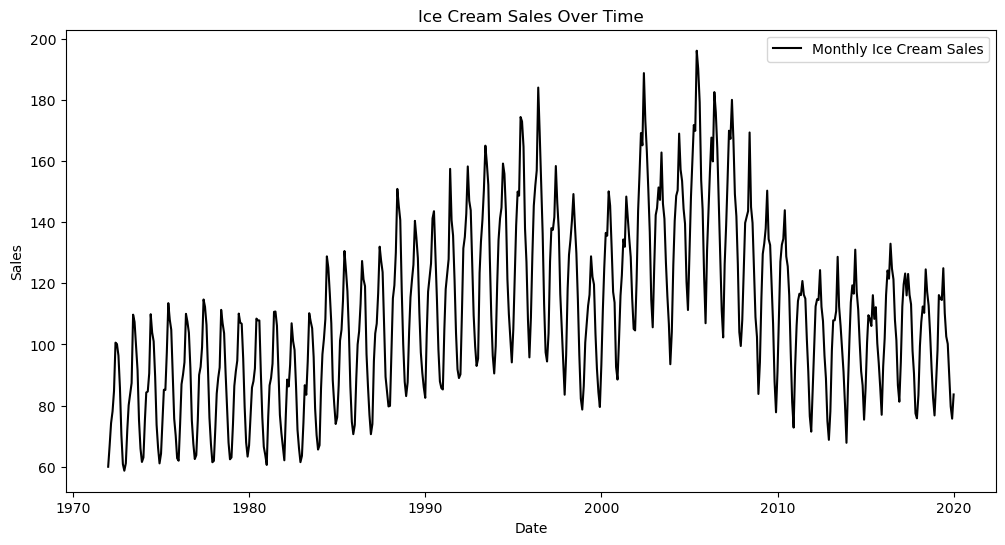

In [62]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label = 'Monthly Ice Cream Sales',color='black')
plt.title('Ice Cream Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [63]:
# Split the data into train and test sets (last 36 months as test)
train = data.iloc[:-36]
test = data.iloc[-36:]

In [64]:
# --- ARIMA Model ---
print("\n--- ARIMA Model ---")
arima_model = ARIMA(train['Sales'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Predict using ARIMA
arima_forecast = arima_fit.forecast(steps=36)
test['ARIMA_Predicted'] = arima_forecast


--- ARIMA Model ---


C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Temp\ipykernel_16896\913953333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_Predicted'] 

In [71]:
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming `train` and `test` DataFrames are already defined and contain 'Sales' and 'ARIMA_Predicted' columns

# ARIMA Model Evaluation
arima_rmse = sqrt(mean_squared_error(test['Sales'], test['ARIMA_Predicted']))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

# SARIMAX Model

sarimax_model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit(disp=False)


ARIMA RMSE: 16.31


C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
# Predict using SARIMAX
sarimax_forecast = sarimax_fit.forecast(steps = 36)
test['SARIMAX_Predicted'] = sarimax_forecast

# Evaluate SARIMAX Model
sarimax_rmse = sqrt(mean_squared_error(test['Sales'], test['SARIMAX_Predicted']))

C:\Users\dbda\AppData\Local\Temp\ipykernel_16896\780371085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SARIMAX_Predicted'] = sarimax_forecast


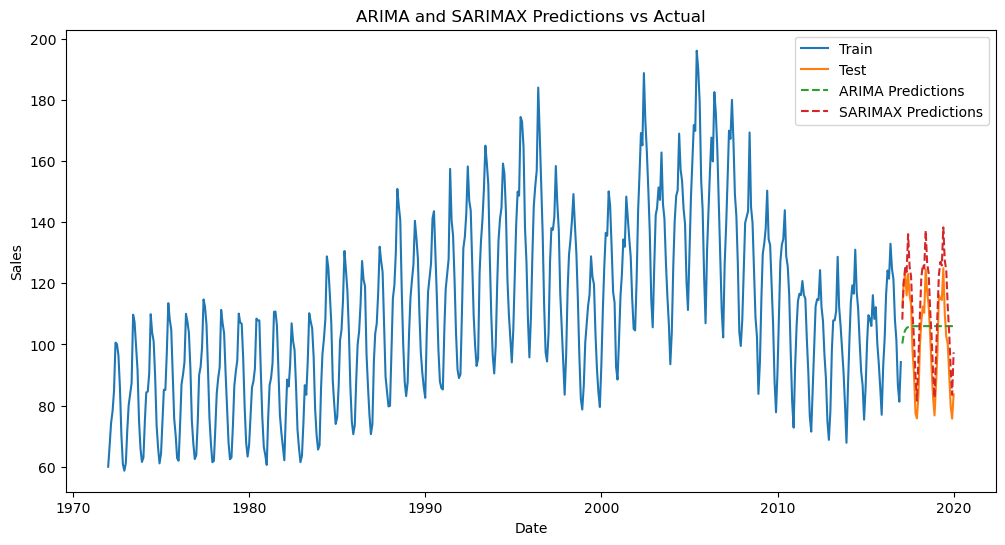

In [73]:
# Plot ARIMA and SARIMAX Predictions
plt.figure(figsize = (12, 6))
plt.plot(train['Sales'], label = 'Train')
plt.plot(test['Sales'], label = 'Test')
plt.plot(test['ARIMA_Predicted'], label='ARIMA Predictions', linestyle = '--')
plt.plot(test['SARIMAX_Predicted'], label='SARIMAX Predictions', linestyle = '--')
plt.title('ARIMA and SARIMAX Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [75]:
# Monte Carlo Simulation 

future_forecast = sarimax_fit.forecast(steps=36)  # SARIMAX future forecast
num_simulations = 1000  # Number of Monte Carlo simulations
simulation_results = []

In [76]:
# Generate simulations
for _ in range(num_simulations):
    noise = np.random.normal(0, sarimax_fit.resid.std(), size=36)  # Add random noise
    simulation = future_forecast + noise
    simulation_results.append(simulation)

In [77]:
# Convert simulations to a DataFrame
simulation_df = pd.DataFrame(simulation_results).T
simulation_df.index = pd.date_range(start = data.index[-1], periods = 36, freq = 'MS')

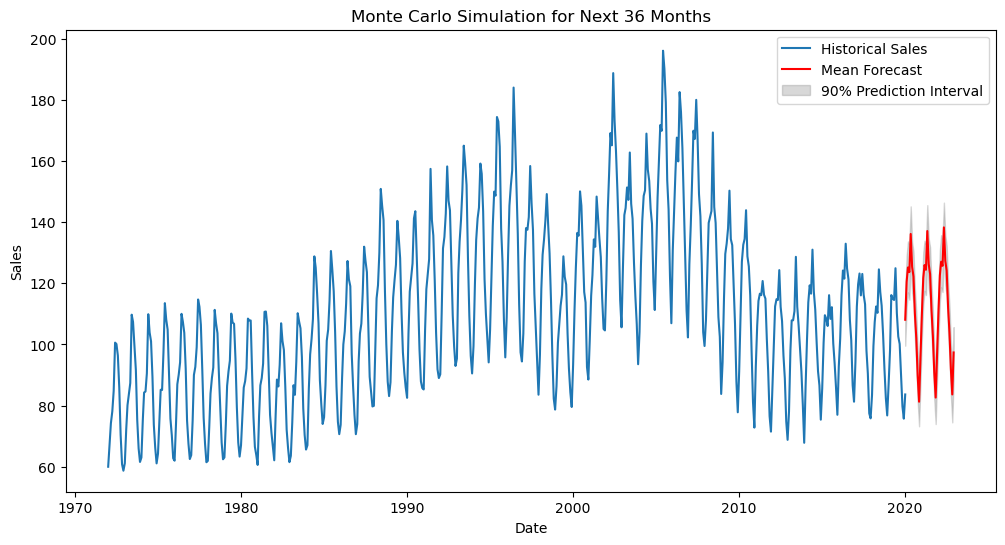

In [78]:
# Plot Monte Carlo simulations
plt.figure(figsize = (12, 6))
plt.plot(data['Sales'], label = 'Historical Sales')
plt.plot(simulation_df.mean(axis = 1), label = 'Mean Forecast', color = 'red')
plt.fill_between(
    simulation_df.index,
    simulation_df.quantile(0.05, axis = 1),
    simulation_df.quantile(0.95, axis = 1),
    color = 'gray',
    alpha = 0.3,
    label = '90% Prediction Interval'
)
plt.title('Monte Carlo Simulation for Next 36 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [79]:
# Print key statistics
print(f"Mean Forecast for Next 36 Months:\n{simulation_df.mean(axis = 1)}")
print(f"90% Prediction Interval:\nLower Bound:\n{simulation_df.quantile(0.05, axis = 1)}\nUpper Bound:\n{simulation_df.quantile(0.95, axis = 1)}") 
print(f"SARIMAX RMSE: {sarimax_rmse:.2f}")

Mean Forecast for Next 36 Months:
2020-01-01    108.085289
2020-02-01    120.502549
2020-03-01    125.216837
2020-04-01    123.698956
2020-05-01    136.176567
2020-06-01    125.428330
2020-07-01    122.248598
2020-08-01    110.021288
2020-09-01    101.932325
2020-10-01     89.772100
2020-11-01     81.255774
2020-12-01     95.449083
2021-01-01    109.720204
2021-02-01    121.747552
2021-03-01    125.996545
2021-04-01    124.456116
2021-05-01    137.137426
2021-06-01    126.313943
2021-07-01    123.074742
2021-08-01    111.302436
2021-09-01    102.739809
2021-10-01     90.830773
2021-11-01     82.615812
2021-12-01     96.479719
2022-01-01    110.581956
2022-02-01    122.610343
2022-03-01    127.094750
2022-04-01    125.738974
2022-05-01    138.332818
2022-06-01    127.361804
2022-07-01    124.169981
2022-08-01    112.172818
2022-09-01    103.767010
2022-10-01     92.109219
2022-11-01     83.636199
2022-12-01     97.380243
Freq: MS, dtype: float64
90% Prediction Interval:
Lower Bound:
202